Running Algorithms on dataset: rc108
BKS cost: 1114.2
BKS solution:
Route #1: 2 6 7 8 46 4 45 5 3 1 100
Route #2: 12 14 47 17 16 15 13 9 11 10
Route #3: 33 32 30 28 26 27 29 31 34 93
Route #4: 41 42 44 43 40 38 37 35 36 39
Route #5: 61 81 94 71 72 54 96
Route #6: 64 51 76 89 18 48 19 20 66
Route #7: 65 83 57 24 22 49 21 23 25 77
Route #8: 69 98 88 53 78 73 79 60 55 70 68
Route #9: 82 99 52 86 87 59 97 75 58 74
Route #10: 90
Route #11: 92 95 67 62 50 63 85 84 56 91 80

HGS cost: 1114.2
HGS solution:
Route #1: 12 14 47 17 16 15 13 9 11 10 
Route #2: 82 99 52 86 87 59 97 75 58 74 
Route #3: 65 83 57 24 22 49 21 23 25 77 
Route #4: 64 51 76 89 18 48 19 20 66 
Route #5: 92 95 67 62 50 63 85 84 56 91 80 
Route #6: 33 32 30 28 26 27 29 31 34 93 
Route #7: 61 81 94 71 72 54 96 
Route #8: 41 42 44 43 40 38 37 35 36 39 
Route #9: 2 6 7 8 46 4 45 5 3 1 100 
Route #10: 90 
Route #11: 69 98 88 53 78 73 79 60 55 70 68 

GLS cost: 1266.9
GLS solution:
Route #1: 71 72 44 43 40 38 37 35 36 39
Route #2:

Algorithms,No. of Routes,Costs,Gap(%),Runtime(seconds)
BKS,11,1114.2,-,-
HGS,11,1114.2,0.0,300.20479583740234
GLS,10,1266.9,13.7,300.1953821182251
ACO,11,1388.5,24.62,414.5521960258484
SA,12,1262.3,13.29,338.1946680545807


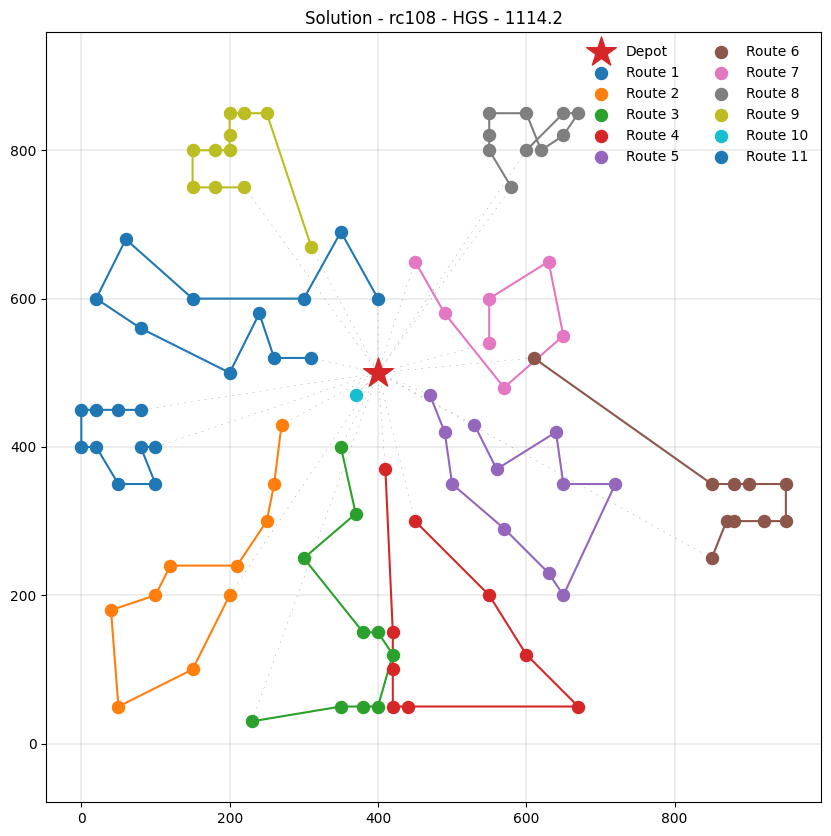

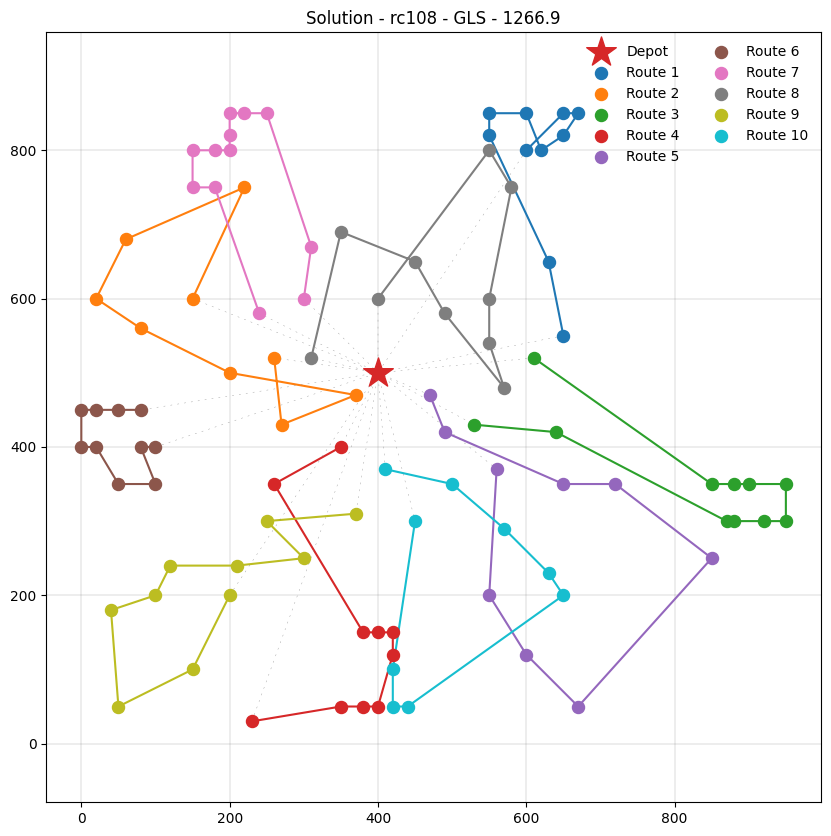

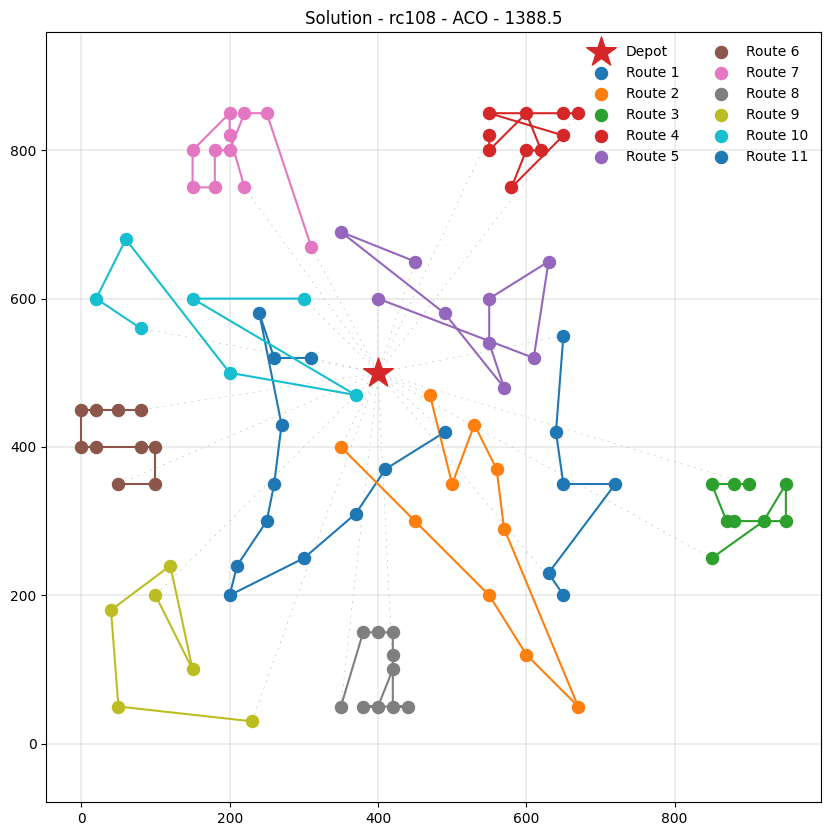

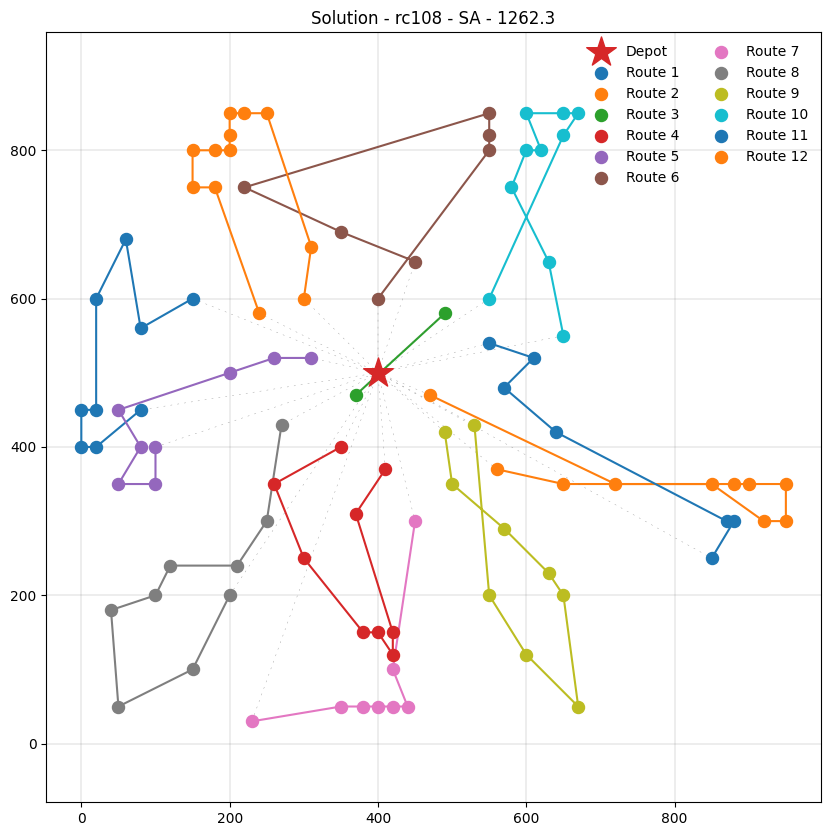

In [1]:
import time
from matplotlib import pyplot as plt
from tabulate import tabulate
from aco.solve import solve_with_aco
from bks import bks_solution
from hgs.solve import solve_with_hgs
from gls.solve import solve_with_gls
from plot import plot_my_solution
from sa.solve import solve_using_sa
from pyvrp import read

dataset = "rc108"
INPUT_PATH = f"data/{dataset}.txt"
BKS_PATH = f"data/{dataset}.sol"
RUNTIME = 300  # seconds

INSTANCE = read(INPUT_PATH, instance_format="solomon", round_func="trunc1")

result = {
    "bks": {},
    "hgs": {},
    "gls": {},
    "aco": {},
    "sa": {},
}
print("Running Algorithms on dataset:", dataset)
result["bks"]["routes"], result["bks"]["cost"] = bks_solution(BKS_PATH)

start = time.time()
result["hgs"]["routes"], result["hgs"]["cost"] = solve_with_hgs(INPUT_PATH, RUNTIME)
result["hgs"]["runtime"] = time.time() - start

start = time.time()
result["gls"]["routes"], result["gls"]["cost"] = solve_with_gls(INPUT_PATH, RUNTIME)
result["gls"]["runtime"] = time.time() - start

start = time.time()
result["aco"]["routes"], result["aco"]["cost"] = solve_with_aco(INPUT_PATH)
result["aco"]["runtime"] = time.time() - start

start = time.time()
result["sa"]["routes"], result["sa"]["cost"] = solve_using_sa(INPUT_PATH)
result["sa"]["runtime"] = time.time() - start

_, ax = plt.subplots(figsize=(10, 10))
plot_my_solution(result["hgs"], INSTANCE, ax=ax, dataset=dataset, algo="HGS")

_, ax = plt.subplots(figsize=(10, 10))
plot_my_solution(result["gls"], INSTANCE, ax=ax, dataset=dataset, algo="GLS")

_, ax = plt.subplots(figsize=(10, 10))
plot_my_solution(result["aco"], INSTANCE, ax=ax, dataset=dataset, algo="ACO")

_, ax = plt.subplots(figsize=(10, 10))
plot_my_solution(result["sa"], INSTANCE, ax=ax, dataset=dataset, algo="SA")

gap = lambda bks_cost, algo_cost: round(100 * (algo_cost - bks_cost) / bks_cost, 2)
header = ["Algorithms", "No. of Routes", "Costs", "Gap(%)", "Runtime(seconds)"]
rows = [
    ["BKS", len(result["bks"]["routes"]), result["bks"]["cost"], "-", "-"],
    [
        "HGS",
        len(result["hgs"]["routes"]),
        result["hgs"]["cost"],
        gap(result["bks"]["cost"], result["hgs"]["cost"]),
        result["hgs"]["runtime"],
    ],
    [
        "GLS",
        len(result["gls"]["routes"]),
        result["gls"]["cost"],
        gap(result["bks"]["cost"], result["gls"]["cost"]),
        result["gls"]["runtime"],
    ],
    [
        "ACO",
        len(result["aco"]["routes"]),
        result["aco"]["cost"],
        gap(result["bks"]["cost"], result["aco"]["cost"]),
        result["aco"]["runtime"],
    ],
    [
        "SA",
        len(result["sa"]["routes"]),
        result["sa"]["cost"],
        gap(result["bks"]["cost"], result["sa"]["cost"]),
        result["sa"]["runtime"],
    ],
]
print("Algorithm results on dataset:", dataset)
tabulate(rows, header, tablefmt="html")

In [2]:
result

{'bks': {'routes': [[1, 3, 45, 5, 8, 7, 6, 46, 4, 2],
   [14, 47, 11, 15, 16, 9, 10, 13, 17, 12],
   [19, 23, 18, 48, 21, 25, 77],
   [33, 28, 27, 26, 31, 34, 50, 93, 94, 80],
   [39, 36, 40, 38, 41, 43, 35, 37, 72],
   [42, 44, 61, 81, 54],
   [65, 99, 87, 59, 97, 75, 58],
   [69, 88, 53, 55, 68],
   [85, 63, 76, 51, 22, 49, 20, 24, 83],
   [90],
   [91, 64, 57, 86, 74, 52, 82],
   [92, 95, 62, 29, 30, 32, 89],
   [96, 71, 67, 84, 56, 66],
   [98, 73, 79, 78, 60, 100, 70]],
  'cost': 1457.4},
 'hgs': {'routes': [[14, 47, 11, 15, 16, 9, 10, 13, 17, 12],
   [65, 99, 87, 59, 97, 75, 58],
   [91, 64, 57, 86, 74, 52, 82],
   [19, 23, 18, 48, 21, 25, 77],
   [85, 63, 76, 51, 22, 49, 20, 24, 83],
   [92, 95, 62, 29, 30, 32, 89],
   [33, 28, 27, 26, 31, 34, 50, 93, 94, 80],
   [96, 71, 67, 84, 56, 66],
   [42, 44, 61, 81, 54],
   [39, 36, 40, 38, 41, 43, 35, 37, 72],
   [1, 3, 45, 5, 8, 7, 6, 46, 4, 2],
   [69, 88, 53, 55, 68],
   [98, 73, 79, 78, 60, 100, 70],
   [90]],
  'cost': 1457.4,
  '